# Rice Leaf Disease Detection

 ## I have divide the project into multiple steps
 * Importing Libraries
 * Data Augmentation & Split data Train,Test set
 * Model Building
 * Model Evaluate 
 * Make Prediction
 * Model classification Report 
 * Single image Prediction

# Importing the Librairies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator, load_img, img_to_array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dropout,BatchNormalization
from keras.callbacks import ModelCheckpoint


# Data Augmentation & Split data Train,Test set

In [2]:
datagen=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.2,
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)
test_datagen=ImageDataGenerator(rescale=1/255,
                        validation_split=0.2)
train_set=datagen.flow_from_directory("mydata",
                                      target_size=(64,64),
                                      batch_size=32,
                                      subset='training',seed=42)
test_set=test_datagen.flow_from_directory("mydata",
                                        target_size=(64,64),
                                        batch_size=32,
                                        subset='validation',seed=42)
labels = (train_set.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.
{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}
{0: 'Bacterial leaf blight', 1: 'Brown spot', 2: 'Leaf smut'}


# Model Building

In [6]:
model=Sequential()

#Convulation layer

model.add(Conv2D(32,(4,4), padding='same',input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(BatchNormalization())

model.add(Conv2D(64,(4,4), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32,(4,4), padding='same',activation='relu'))
model.add(BatchNormalization())

#Covers
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax'))

#Checkpoint
filepath="trained_model.h6"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_set,
                    epochs=30,
                    steps_per_epoch=1900//32,
                    validation_data=test_set,
                    validation_steps=502//16,
                    workers = 4,
                    callbacks=callbacks_list) 

Epoch 1/30
59/59 [==============================] - ETA: 0s - loss: 0.7680 - accuracy: 0.6743
Epoch 00001: val_accuracy improved from -inf to 0.34783, saving model to trained_model.h6
INFO:tensorflow:Assets written to: trained_model.h6\assets
59/59 [==============================] - 82s 1s/step - loss: 0.7680 - accuracy: 0.6743 - val_loss: 1.6117 - val_accuracy: 0.3478
Epoch 2/30
59/59 [==============================] - ETA: 0s - loss: 0.3594 - accuracy: 0.8512
Epoch 00002: val_accuracy did not improve from 0.34783
59/59 [==============================] - 77s 1s/step - loss: 0.3594 - accuracy: 0.8512 - val_loss: 2.9945 - val_accuracy: 0.2174
Epoch 3/30
59/59 [==============================] - ETA: 0s - loss: 0.2692 - accuracy: 0.8967
Epoch 00003: val_accuracy did not improve from 0.34783
59/59 [==============================] - 76s 1s/step - loss: 0.2692 - accuracy: 0.8967 - val_loss: 4.4059 - val_accuracy: 0.3478
Epoch 4/30
59/59 [==============================] - ETA: 0s - loss: 0.26

# Model evaluate

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
from keras.models import load_model
model = load_model("trained_model.h6")
score = model.evaluate(test_set, verbose=0)
print("validation loss:" , score[0])
print("validation accuracy", score[1])

validation loss: 0.020420538261532784
validation accuracy 1.0


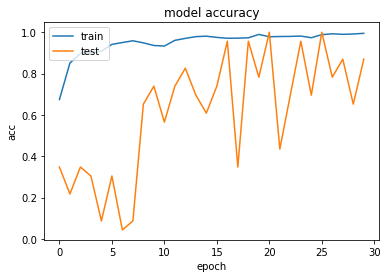

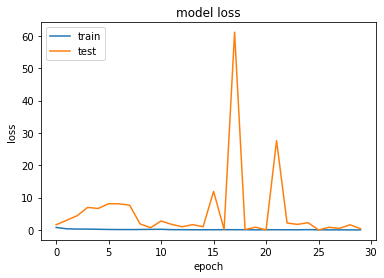

In [29]:
def line_plot(series, legends, title, ylabel, xlabel):
    for s in series:
        plt.plot(s)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(legends, loc='upper left')
    #plt.ylim([0, 1.1])
    plt.show()

    
line_plot(
    [history.history['accuracy'], history.history['val_accuracy']],
    ['train', 'test'],
    'model accuracy',
    'acc',
    'epoch'
)

line_plot(
    [history.history['loss'], history.history['val_loss']],
    ['train', 'test'],
    'model loss',
    'loss',
    'epoch'
)

# Make predictions

In [20]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)

predictions = model.predict(test_set, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes1 = np.argmax(predictions, axis=1)
predicted_classes1

array([1, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2,
       0], dtype=int64)

# Model Classification report

In [21]:
from sklearn import metrics
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys()) 
report = metrics.classification_report(true_classes, predicted_classes1, target_names=class_labels)
print(report)


                       precision    recall  f1-score   support

Bacterial leaf blight       0.38      0.38      0.38         8
           Brown spot       0.38      0.38      0.38         8
            Leaf smut       0.57      0.57      0.57         7

             accuracy                           0.43        23
            macro avg       0.44      0.44      0.44        23
         weighted avg       0.43      0.43      0.43        23



# Single image prediction

In [22]:
def prediction(path):
    img = load_img(path, target_size=(64,64))
    i = img_to_array(img)
    im = i/255
    img = np.expand_dims(im, axis=0)
    pred = np.argmax(model.predict(img))
    
    
    print(f"Label of prediction classs: {pred}")
    print(f"The image belogns to {labels[pred]} class")

In [23]:
path ="Bactorial_leaf_blight.jpg"
prediction(path)

Label of prediction classs: 0
The image belogns to Bacterial leaf blight class


In [24]:
path ="brown_spot.jpg"
prediction(path)

Label of prediction classs: 1
The image belogns to Brown spot class


In [25]:
path ="leaf_smut.jpg"
prediction(path)

Label of prediction classs: 2
The image belogns to Leaf smut class
